In [1]:
# 라이브러리
import os
import sys
import urllib.request
import re
import pandas as pd
import time
from bs4 import BeautifulSoup
import numpy as np
import requests
from naver_blog_api import naver_blog
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

### 네이버 api, beautifulsoup로 블로그 크롤링

In [2]:
client_id = "발급받은 api id"
client_secret = "발급받은 api 비밀번호"

In [5]:
# 전주 호텔 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 호텔", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 호텔 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 호텔", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df = pd.concat([df1, df2])
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,title,link,postdate,text
0,[전주 숙소] 중화산동 투썸 호텔(모텔) 출장 숙박 후기,https://blog.naver.com/alpano/223091508269,20230504,NaN
1,전주 호텔 숙소추천 신축 호캉스 조식까지,https://blog.naver.com/hamoni0598/222958337095,20221217,NaN
2,전주호텔추천 호텔아라리 : 루프탑과 시티뷰과 아름다운 전주고...,https://blog.naver.com/ellasha123/223109042946,20230522,NaN
3,전주호텔추천 _라한호텔전주(조식뷔페 전주산책 카페 이용) 4월,https://blog.naver.com/fksl0902/223071598782,20230415,NaN
4,한옥마을에서 가까운 베스트웨스턴플러스전주호텔...,https://blog.naver.com/apple_kitty/223054369341,20230324,NaN


In [8]:
# 전주 숙소 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 숙소", 100, 1)
temp = blog_temp1.blog_api()
df3 = blog_temp1.preprocessing(temp)

# 전주 숙소 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 숙소", 100, 100)
temp = blog_temp2.blog_api()
df4 = blog_temp2.preprocessing(temp)

df2 = pd.concat([df3, df4])
df2 = df2.drop_duplicates().reset_index(drop=True)
df2.head()

,title,link,postdate,text
0,전주 숙소 추천 수영장 있는 펜션 스테이노트! (ft.풀빌라),https://blog.naver.com/82ljy/223089416538,20230430,NaN
1,[전주 숙소] 중화산동 투썸 호텔(모텔) 출장 숙박 후기,https://blog.naver.com/alpano/223091508269,20230504,NaN
2,루프탑과 시티뷰과 아름다운 전주고속버스터미널 근처 숙소,https://blog.naver.com/ellasha123/223109042946,20230522,NaN
3,전주 한옥마을 근처 숙소 전주 풍경 호텔,https://blog.naver.com/rjsgml2981/223085044098,20230425,NaN
4,전주 호텔 추천 왕의 지밀 가족여행 한옥 숙소,https://blog.naver.com/fujii/223020404589,20230219,NaN


In [11]:
# 전주 펜션 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 펜션", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 펜션 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 펜션", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df3 = pd.concat([df1, df2])
df3 = df3.drop_duplicates().reset_index(drop=True)
df3.head()

,title,link,postdate,text
0,전주한옥마을 독채펜션 :: 자쿠지 스파 :: 경기전 아침 신상 숙소,https://blog.naver.com/real1jh/223112337079,20230526,NaN
1,힐링만족한 전주 수영장 펜션 또 가고파,https://blog.naver.com/aza0979/222738611962,20220519,NaN
2,전주 펜션 전주한옥마을 한복대여 이화고택,https://blog.naver.com/ekdp31/223107429221,20230520,NaN
3,전주 근교 완주 독채펜션 스테이수채화 감성숙소 자쿠지,https://blog.naver.com/hbaroong/223107241918,20230520,NaN
4,전주여행 전주펜션 숲내음펜션 카라반 이용후기,https://blog.naver.com/k_woojung/222802456393,20220706,NaN


In [13]:
# 전주 리조트 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 리조트", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 리조트 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 리조트", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df4 = pd.concat([df1, df2])
df4 = df4.drop_duplicates().reset_index(drop=True)
df4.head()

,title,link,postdate,text
0,오션뷰지오리조트낙산어촌계활어회센타 전주식당 후기,https://blog.naver.com/semiingg/223090076219,20230501,NaN
1,전주 풀빌라 내장산 광주 근교 엘리스테이 리조트,https://blog.naver.com/moon6123/222521943317,20210930,NaN
2,귀촌을 위한 전주워터파크리조트 호텔급 펜션 선착순 분양,https://blog.naver.com/jjjyyy555/223115687484,20230530,NaN
3,#전주숙소추천 상관리조트&amp;스파 편백나무숲 가족여행숙소!,https://blog.naver.com/lsbangel/222539874733,20211017,NaN
4,전주풀빌라 광주리조트 2살 4살 아이와 같이갈 숙소추천...,https://blog.naver.com/idsheshe/222546296462,20211024,NaN


In [15]:
# 전주 게스트하우스 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 게스트하우스", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 게스트하우스 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 게스트하우스", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df5 = pd.concat([df1, df2])
df5 = df5.drop_duplicates().reset_index(drop=True)
df5.head()

,title,link,postdate,text
0,전주 게스트하우스 패밀리룸과 무료 조식 너무 좋음,https://blog.naver.com/runtob/222559823699,20211118,NaN
1,전주한옥마을게스트하우스-마당예쁜집-전주게스트하우스,https://blog.naver.com/adsl7439000/223113617460,20230529,NaN
2,전주 한옥마을 숙박 다락 전주 게스트하우스 분위기 좋아요,https://blog.naver.com/uhm815/222976677522,20230106,NaN
3,전주게스트하우스 단독룸 달팽이의하루 톡하우스 게하파티,https://blog.naver.com/sugar9976/223115705998,20230530,NaN
4,전주여행을 위한 전주게스트하우스추천 톡게스트하우스(파티...,https://blog.naver.com/chacha_ye_/223093086275,20230504,NaN


In [17]:
# 전주 호스텔 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 호스텔", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 호스텔 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 호스텔", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df6 = pd.concat([df1, df2])
df6 = df6.drop_duplicates().reset_index(drop=True)
df6.head()

,title,link,postdate,text
0,전주 게스트하우스 &apos;전주호스텔&apos; 6인실 후기,https://blog.naver.com/mung-mung-/222913624056,20221029,NaN
1,전주여행 전주한옥마을소리울 호스텔 이용후기(내돈내산),https://blog.naver.com/pji0505/222727461798,20220510,NaN
2,전주 한옥마을 감성 숙소 :: 인센스 호스텔 신상 &amp; 자쿠지는 못...,https://blog.naver.com/gk4216/223102179393,20230515,NaN
3,깔끔하고 저렴한 전주역 숙소 - 전주인터내셔널호스텔 후기,https://blog.naver.com/suchonfilm/222453394635,20210801,NaN
4,전주 숙소 인터내셔널호스텔 후기,https://blog.naver.com/g_i_f_t_/222820896040,20220721,NaN


In [19]:
# 전주 여관 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 여관", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 여관 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 여관", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df7 = pd.concat([df1, df2])
df7 = df7.drop_duplicates().reset_index(drop=True)
df7.head()

,title,link,postdate,text
0,반려견 동반 숙소::전주 대명여관,https://blog.naver.com/voov_v/222832736178,20220730,NaN
1,일정 - 비빔소리 전주 라한호텔 곡성여관 감성 독채 숙소 추천,https://blog.naver.com/cjdghkdbfls/223112565606,20230526,NaN
2,전주 대명여관 : 애견동반 게스트하우스,https://blog.naver.com/bibi_log/222724718635,20220509,NaN
3,전주 한옥마을 가까운 숙소 대명여관 후기,https://blog.naver.com/anseok45/222900802754,20221015,NaN
4,전주미래유산 ① - 미원탑 터 한성여관 거북바위,https://blog.naver.com/jbgokr/222506290404,20210915,NaN


In [21]:
# 전주 모텔 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 모텔", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 모텔 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 모텔", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df8 = pd.concat([df1, df2])
df8 = df8.drop_duplicates().reset_index(drop=True)
df8.head()

,title,link,postdate,text
0,[전주 숙소] 중화산동 투썸 호텔(모텔) 출장 숙박 후기,https://blog.naver.com/alpano/223091508269,20230504,NaN
1,금암동 화이트 관광호텔 터미널 근처 숙소 전주 모텔,https://blog.naver.com/yunseung4537/223052535909,20230322,NaN
2,전주 모텔 \/ 한옥마을 모텔 &lt;이카로스무인텔&gt; 만족도짱!,https://blog.naver.com/csy09260/223116226541,20230531,NaN
3,가성비좋은 전주터미널숙소 뷰티모텔 내돈내산 숙박 후기,https://blog.naver.com/yej200628/223099491704,20230511,NaN
4,전주 모텔 터미널 부근 마리호텔 후기,https://blog.naver.com/unis05/223021250150,20230220,NaN


In [23]:
# 전주 민박 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 민박", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 민박 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 민박", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df9 = pd.concat([df1, df2])
df9 = df9.drop_duplicates().reset_index(drop=True)
df9.head()

,title,link,postdate,text
0,익산 키즈풀빌라 아가별민박 : 전주 근교 가성비 풀빌라,https://blog.naver.com/whitefringe/223105744011,20230518,NaN
1,[에어비앤비] 영이네민박 전주 mbc 마녀들의 포레스트편,https://blog.naver.com/ibbmi417/223012509252,20230211,NaN
2,전주 한옥민박 홍시,https://blog.naver.com/lipsalove/223062450962,20230402,NaN
3,[숙소]전주 깔끔 민박 &quot;동춘&quot; 만족 후기,https://blog.naver.com/c-ppangya/223092348777,20230503,NaN
4,전주여행 완주계곡 민박산장 평상대여 지리산 흑돼지 닭백숙...,https://blog.naver.com/k_woojung/222811303429,20220714,NaN


In [26]:
# 전주 콘도 검색 : 1 ~ 100
blog_temp1 = naver_blog(client_id, client_secret, "전주 콘도", 100, 1)
temp = blog_temp1.blog_api()
df1 = blog_temp1.preprocessing(temp)

# 전주 콘도 검색 : 100 ~ 199
blog_temp2 = naver_blog(client_id, client_secret, "전주 콘도", 100, 100)
temp = blog_temp2.blog_api()
df2 = blog_temp2.preprocessing(temp)

df10 = pd.concat([df1, df2])
df10 = df10.drop_duplicates().reset_index(drop=True)
df10.head()

,title,link,postdate,text
0,전주시 콘도(호텔) 경매 완산구 고사동 라마다전주호텔 경매,https://blog.naver.com/hks5266/223093814317,20230504,NaN
1,전주시 라마다전주호텔 경매 (전주시 완산구 콘도(호텔)경매),https://blog.naver.com/honey-hong/223112693875,20230526,NaN
2,전주시 라마다전주호텔 경매 (전주시 완산구 콘도(호텔)경매),https://blog.naver.com/gookje2019/223073067223,20230413,NaN
3,전주시 콘도(호텔) 경매 완산구 고사동 라마다전주호텔 경매,https://blog.naver.com/shransky/223081039516,20230421,NaN
4,전주시 콘도(호텔) 경매 완산구 고사동 라마다전주호텔 경매,https://blog.naver.com/ttealtteal2/223115648684,20230530,NaN


In [57]:
# 크롤링한 포스팅 concat
hotel = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10]).drop_duplicates().reset_index(drop=True)
# 경매 단어 포함 시 제외
hotel = hotel[hotel['title'].str.contains("경매") == False].reset_index(drop=True)
# 링크에 blog 미포함 시 제외
hotel = hotel[hotel['link'].str.contains("blog") == True].reset_index(drop=True)
hotel.shape

(1691, 4)

In [62]:
hotel.isna().sum()

title          0
link           0
postdate       0
text        1691
dtype: int64

In [65]:
def text_crawl(dataframe):
    for i,j in enumerate(dataframe['link']):
        if pd.isnull(dataframe.loc[i, 'text']): #아직 크롤링되지 않은 부분부터
            resp = requests.get(j, timeout=3)
            soup = BeautifulSoup(resp.content, "html.parser")
            try:
                # 수집할 수 있는 url 파싱
                url = "https://blog.naver.com/"+soup.iframe['src']
                resp = requests.get(url, timeout=3)
                soup = BeautifulSoup(resp.content, "html.parser")

                if soup.find("div", attrs={'class':'se-main-container'}): #스마트 에디터 ONE
                    text = soup.find("div", attrs={'class':'se-main-container'}).get_text()
                    text = text.replace("\n", "")
                elif soup.select_one('div#postViewArea'): #스마트 에디터 2.0
                    text = soup.select_one('div#postViewArea').text
                    text = text.replace("\n", "")
                else:
                    text = 'None'
                dataframe.loc[i, 'text'] = text
            except TypeError:
                print(i, "번째 크롤링 불가")
                text = 'None'
                dataframe.loc[i, 'text'] = text
            if i % 100 == 0:
                print(i, "번째 본문 크롤링 완료")
        time.sleep(0.5)
    return dataframe

In [67]:
hotel_crawl = text_crawl(hotel)
hotel_crawl.head()

500 번째 본문 크롤링 완료
600 번째 본문 크롤링 완료
700 번째 본문 크롤링 완료
800 번째 본문 크롤링 완료
900 번째 본문 크롤링 완료
1000 번째 본문 크롤링 완료
1100 번째 본문 크롤링 완료
1200 번째 본문 크롤링 완료
1300 번째 본문 크롤링 완료
1400 번째 본문 크롤링 완료
1500 번째 본문 크롤링 완료
1600 번째 본문 크롤링 완료


,title,link,postdate,text
0,[전주 숙소] 중화산동 투썸 호텔(모텔) 출장 숙박 후기,https://blog.naver.com/alpano/223091508269,20230504,올해는 전주국제영화제 출장이 좀 늦게 결정됐다. 영화제 2주 전쯤 급하게 야놀자와 ...
1,전주 호텔 숙소추천 신축 호캉스 조식까지,https://blog.naver.com/hamoni0598/222958337095,20221217,전주여행을 갈때마다 들리는 전주 호텔입니다.전주역에서 가깝고요. 숙소로 가성비 좋고...
2,전주호텔추천 호텔아라리 : 루프탑과 시티뷰과 아름다운 전주고...,https://blog.naver.com/ellasha123/223109042946,20230522,전주호텔추천 호텔아라리루프탑과 시티뷰과 아름다운 전주고속버스터미널 근처 숙소 전주...
3,전주호텔추천 _라한호텔전주(조식뷔페 전주산책 카페 이용) 4월,https://blog.naver.com/fksl0902/223071598782,20230415,"전주, 오길 잘했지?아는 지인 SNS에서 한옥뷰를 보고 꼭 가보고 싶었던 호텔입니다..."
4,한옥마을에서 가까운 베스트웨스턴플러스전주호텔...,https://blog.naver.com/apple_kitty/223054369341,20230324,​ 베스트웨스턴플러스전주호텔주소 ; 전북 전주시 완산구 현무1길 41전화번호 ; ...


In [75]:
hotel_crawl['postdate'] = hotel_crawl['postdate'].astype('int32')
hotel_crawl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1691 non-null   object
 1   link      1691 non-null   object
 2   postdate  1691 non-null   int32 
 3   text      1691 non-null   object
dtypes: int32(1), object(3)
memory usage: 46.4+ KB


In [70]:
hotel_crawl[hotel_crawl['text'] == 'None'].shape #크롤링 안 된 개수 몇 개인지 확인

(239, 4)

In [72]:
239 / 1691 * 100

14.133648728562981

In [77]:
print(hotel_crawl[hotel_crawl['text'] == 'None']['postdate'].min())
print(hotel_crawl[hotel_crawl['text'] == 'None']['postdate'].max())

20151127
20181203


In [78]:
print(hotel_crawl[hotel_crawl['text'] != 'None']['postdate'].min())
print(hotel_crawl[hotel_crawl['text'] != 'None']['postdate'].max())

20060619
20230531


In [80]:
hotel_crawl.isna().sum()

title       0
link        0
postdate    0
text        0
dtype: int64

In [81]:
# 크롤링 된 것만 사용
final = hotel_crawl[hotel_crawl['text'] != 'None'].reset_index()
final.to_csv("전주 숙소 블로그 검색.csv", encoding='utf-8-sig', index=False)

In [82]:
final.shape

(1452, 5)

In [123]:
## 전처리 : 한글만 남기기 - 형태소 분석 - 불용어 제거
final['text clean'] = np.nan

for i,j in enumerate(final['text']):
    tokenizer = Okt()

    k = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "", j) #한글만 남기기
    #명사만 남기기 & 한 글자 형태소는 제외
    new_k = list()
    for w in tokenizer.nouns(k):
        if (len(w) != 1):
            new_k.append(w)
    #불용어 제거
    stop_word = ['전주', '전라북도', '전북', '여행', '관광', '전주시', '숙소', '호텔', '펜션', \
                 '리조트', '게스트하우스', '호스텔', '여관', '모텔', '민박', '콘도', '정말', '진짜', '바로', '완전']
    token = [t for t in new_k if t not in stop_word]
    text = ' '.join(token)

    final.loc[i, 'text clean'] = text

### count 기준 워드클라우드

In [124]:
# 말뭉치 리스트 생성
word_list = list()

for t in final['text clean']:
    word_list.append(t.split(" "))
word_list = sum(word_list, []) # 2차원 1차원으로 변환
len(word_list)

285407

In [85]:
wc = WordCloud(font_path = 'BCcardB',
               background_color = 'white',
               width = 3000, height = 2000,
               min_font_size = 10) #워드클라우드 설정

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [125]:
# count vectorizer wordcloud
from collections import Counter

c = Counter(word_list)
word_dict = dict(c.most_common(100)) #상위 100개만
word_dict

{'마을': 3974,
 '시간': 1765,
 '사진': 1649,
 '이용': 1512,
 '예약': 1507,
 '숙박': 1411,
 '화장실': 1316,
 '객실': 1308,
 '준비': 1244,
 '우리': 1240,
 '추천': 1239,
 '위치': 1230,
 '생각': 1196,
 '저희': 1185,
 '가족': 1140,
 '공간': 1140,
 '침대': 1087,
 '하나': 1064,
 '정도': 1030,
 '아이': 1030,
 '느낌': 988,
 '여기': 973,
 '아침': 971,
 '사람': 951,
 '카페': 928,
 '완산구': 895,
 '조식': 893,
 '체크': 863,
 '사용': 763,
 '맛집': 754,
 '때문': 740,
 '거리': 736,
 '주차': 736,
 '방문': 724,
 '다음': 715,
 '친구': 690,
 '분위기': 686,
 '저녁': 678,
 '아주': 673,
 '마음': 665,
 '주차장': 654,
 '모습': 644,
 '시설': 638,
 '조금': 614,
 '대명': 614,
 '가격': 613,
 '이번': 594,
 '커피': 576,
 '사장': 570,
 '다른': 567,
 '도착': 559,
 '근처': 550,
 '상관': 548,
 '다시': 544,
 '건물': 535,
 '그냥': 525,
 '오늘': 518,
 '내부': 511,
 '음식': 504,
 '제공': 497,
 '하루': 491,
 '구경': 491,
 '한번': 490,
 '모두': 486,
 '바베큐': 476,
 '수건': 464,
 '보고': 462,
 '처음': 461,
 '위해': 461,
 '냉장고': 460,
 '힐링': 460,
 '테이블': 459,
 '체험': 459,
 '스파': 452,
 '후기': 444,
 '기분': 444,
 '입구': 441,
 '가장': 438,
 '로비': 434,
 '방이': 432,
 '소개': 431,
 

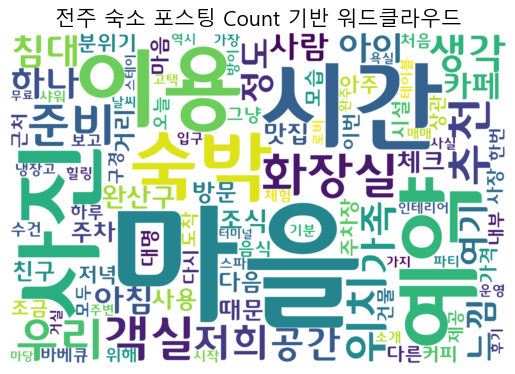

In [126]:
cloud = wc.generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.title("전주 숙소 포스팅 Count 기반 워드클라우드", fontsize = 15)
plt.axis('off')
plt.show()

### TF-IDF 워드 클라우드

In [127]:
# tfidf vectorizer wordcloud
def tfidf_counter(txt):
    ### tfidf vectorizer 생성 및 적용
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(txt)
    tfidf = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names_out())
    counter = tfidf.T.sum(axis = 1)
    # tf-idf 값이 가장 큰 100개만 추출
    final = counter.sort_values(ascending=False)[:100]
    return final

In [128]:
word_dict = tfidf_counter(final['text clean']).to_dict()
word_dict

{'마을': 71.15165540102028,
 '숙박': 33.702855636256295,
 '대명': 32.414048756156284,
 '예약': 31.24301196636497,
 '사진': 30.62632727902765,
 '객실': 30.47688663740856,
 '이용': 29.98417087772813,
 '시간': 29.45600601141908,
 '화장실': 26.96032513637999,
 '저희': 26.872836650191598,
 '우리': 26.70708101601974,
 '위치': 25.739332824138135,
 '추천': 25.571015638722294,
 '준비': 25.462071820406756,
 '침대': 25.458775241103744,
 '공간': 25.276024123919978,
 '가족': 23.862798124656596,
 '조식': 23.212600274117023,
 '생각': 22.91604914538949,
 '아이': 22.832330823156692,
 '카페': 22.61979447843128,
 '느낌': 22.119174207630056,
 '완산구': 21.61174894423447,
 '여기': 21.60542714486135,
 '하나': 21.521225161018723,
 '아침': 21.38019539270536,
 '체크': 21.1899075105722,
 '사람': 20.70830124098925,
 '친구': 20.46530376834747,
 '정도': 20.44434375848274,
 '주차': 18.556147489890993,
 '방문': 18.3678493907792,
 '맛집': 18.265773238980167,
 '가격': 18.12855196822536,
 '파티': 17.983531435095838,
 '사장': 17.95117313097791,
 '사용': 17.70430868951829,
 '상관': 17.546789369774

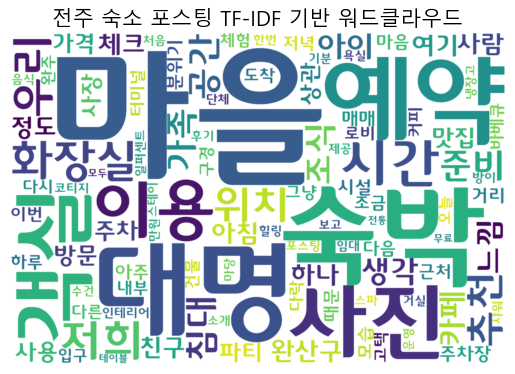

In [129]:
cloud = wc.generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.title("전주 숙소 포스팅 TF-IDF 기반 워드클라우드", fontsize = 15)
plt.axis('off')
plt.show()